In [102]:
# start_date: 2025_07_16

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
# Load dataset
netflix_data = pd.read_csv("datasets/Netflix_Shows_Movies.csv")

In [105]:
# Clean, Transform and Preprocess
netflix_data.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [106]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [107]:
netflix_data.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [108]:
# Fill NA values with reasonable values
netflix_data["age_certification"].fillna("Unknown", inplace=True)
netflix_data["imdb_votes"].fillna(netflix_data["imdb_votes"].median(), inplace=True)
netflix_data["description"].fillna("Unknown", inplace=True)

In [109]:
# Drop unnecessary columns
netflix_data.drop(columns="index", axis=1, inplace=True)

In [110]:
# Change column name
netflix_data.rename(columns={"runtime": "runtime_in_min"}, inplace=True)

In [111]:
# 1. Which type (MOVIE or SHOW) of content have the highest average IMDb scores?

netflix_data.groupby("type")["imdb_score"].mean().round(2)

type
MOVIE    6.27
SHOW     7.02
Name: imdb_score, dtype: float64

In [112]:
# Is it because MOVIEs have more entries?

netflix_data.groupby("type")["id"].count()

# Yes, there are more MOVIEs, which allows for more outliers that can decrease the average imdb_score. How about the median value?

type
MOVIE    3407
SHOW     1876
Name: id, dtype: int64

In [113]:
netflix_data.groupby("type")["imdb_score"].median().round(2)

# SHOWs also have a better median value, which can show us that maybe the SHOWs on Netflix are more succesfull than the MOVIEs on Netflix.

type
MOVIE    6.4
SHOW     7.2
Name: imdb_score, dtype: float64

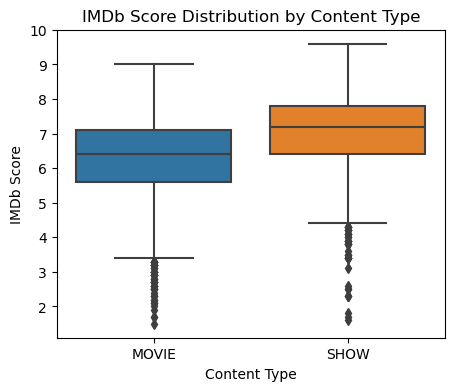

In [114]:
# Plot the data
plt.figure(figsize=(5, 4))
sns.boxplot(x='type', y='imdb_score', data=netflix_data)
plt.xlabel('Content Type')
plt.ylabel('IMDb Score')
plt.title('IMDb Score Distribution by Content Type')
plt.savefig('plots/boxplot_type_imdb.png')
plt.show()

In [115]:
# Count the outliers of each type of content

movies = netflix_data[netflix_data['type'] == 'MOVIE']
shows = netflix_data[netflix_data['type'] == 'SHOW']

def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    return (series < lower).sum()
    
movie_outliers = count_outliers(movies['imdb_score'])
show_outliers = count_outliers(shows['imdb_score'])
movie_outliers_in_pct = (movie_outliers / netflix_data["imdb_score"].count()).round(4) * 100
show_outliers_in_pct = (show_outliers / netflix_data["imdb_score"].count()).round(4) * 100

print(f"Number of IMDb score outliers in movies: {movie_outliers}")
print(f"Percent of IMDb score outliers in movies: {movie_outliers_in_pct}%")
print(f"Number of IMDb score outliers in shows: {show_outliers}")
print(f"Percent of IMDB score outliers in shows: {show_outliers_in_pct}%")



Number of IMDb score outliers in movies: 54
Percent of IMDb score outliers in movies: 1.02%
Number of IMDb score outliers in shows: 44
Percent of IMDB score outliers in shows: 0.83%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age Certification', ylabel='IMDB Score'>

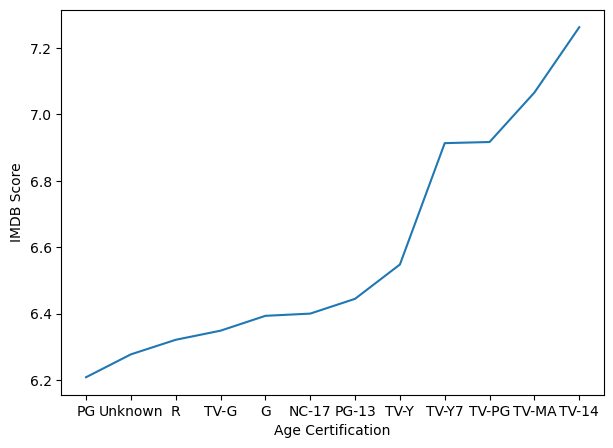

In [167]:
# How does content rating (age certification) affect viewer ratings?
age_imdbscore = netflix_data.groupby(['age_certification'])[['imdb_score']].mean().sort_values(by='imdb_score')
age_imdbscore.reset_index()
plt.figure(figsize=(7,5))
plt.xlabel('Age Certification')
plt.ylabel('IMDB Score')
sns.lineplot(x='age_certification', y='imdb_score', data=age_imdbscore)

# Results show that there is no clear trend between the IMDB Scores and the Age Certifications.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


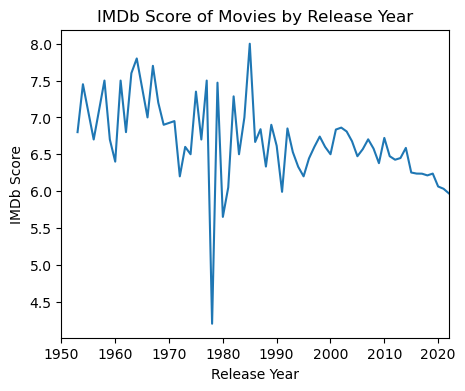

In [221]:
#  Is there a trend in quality over time (IMDb score vs. release year)?

release_year_imdbscore_movies = movies.groupby(['release_year'])[['imdb_score']].mean().sort_values(by='release_year').reset_index()
release_year_imdbscore_shows = shows.groupby(['release_year'])[['imdb_score']].mean().sort_values(by='release_year').reset_index()
plt.figure(figsize=(5, 4))
sns.lineplot(x='release_year', y='imdb_score', data=release_year_imdbscore_movies)
plt.xlabel('Release Year')
plt.xlim(1950, 2022)
plt.ylabel('IMDb Score')
plt.title('IMDb Score of Movies by Release Year')
#plt.savefig('plots_images/lineplot_year_imdb_movies.png')
plt.show()

#release_year_imdbscore_shows.to_csv('datasets/releaseYearIMDB_Shows.csv')
#release_year_imdbscore_movies.to_csv('datasets/releaseYearIMDB_Movies.csv')

# Esspacially for shows-data, it is clear that there are no sufficient entries in the dataset. This could be seen in the fluctiations.
# However, for both content-type there is no clear pattern. But it would not be wrong to say that the trends show that the imdb_scores are
# getting worse with the time.

In [233]:
# Now use pivot tables, display only the last 10 years for readability

pd.pivot_table(netflix_data.query('release_year > 2012'), 
               index='type', 
               columns='release_year', 
               values='imdb_score', 
               aggfunc='mean').style.background_gradient(cmap='RdYlGn', axis=1)

release_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
type,,,,,,,,,,
MOVIE,6.448454,6.586111,6.252239,6.237559,6.236243,6.212975,6.237527,6.062408,6.031630,5.968889
SHOW,7.113514,7.286047,7.366304,7.264493,7.135593,7.026923,7.009643,6.803600,6.747101,6.551087
